# Pattern Recognition - ViBOT MsCV

Guillaume Lemaitre - Fabrice Meriaudeau - Johan Massich

# Clustering

In [1]:

%matplotlib inline
%pprint off

# Matplotlib library
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# MPLD3 extension
import mpld3

# Numpy library
import numpy as np

# Import the Scipy library for griddata
from scipy.interpolate import griddata


Pretty printing has been turned OFF


Import the library to perform the clustering with k-means and fuzzy c-means.

In [2]:

# Import k-means clustering method from scikit-learn
from sklearn.cluster import KMeans
# Import fuzzy c-means from scikit-fuzzy
import skfuzzy as fuzz


Assuming the following generated points:

* Two classes with respective labels 0 and 1,
* Class #1 follows with labels 0 a multivariate normal distribution with:

$$\mu_1 = \left[ 1, 1 \right]$$

$$\Sigma_1 = \left[ \begin{matrix} 1 && 0 \\ 0 && 1 \end{matrix} \right]$$

* Class #2 with labels 1 follows a multivariate normal distribution with:

$$\mu_2 = \left[ -1, -1 \right]$$

$$\Sigma_2 = \left[ \begin{matrix} 1 && 0 \\ 0 && 1 \end{matrix} \right]$$

In [16]:

# Size of points in the dataset
N = 1000

# Define the property of the gaussian distribution
mean1, mean2 = np.array([1., 1.]), np.array([-1., -1.])
cov1, cov2 = np.diagflat([1, 1]), np.diagflat([1, 1])

class_1 = np.random.multivariate_normal(mean1, cov1, N / 2)
class_2 = np.random.multivariate_normal(mean2, cov2, N / 2)

data = np.concatenate((class_1, class_2), axis=0)
gt = np.squeeze(np.concatenate((np.zeros((1, N / 2), dtype = int), np.ones((1, N / 2), dtype = int)), axis = 1))

fig = plt.figure()
# Find the indexes of the first cluster
plt.plot(class_1[:, 0], class_1[:, 1], 'xb', label='Cluster #1')
plt.plot(class_2[:, 0], class_2[:, 1], 'xr', label='Cluster #2')
plt.legend()
# Show the figure
mpld3.display(fig)


### Clustering via k-means

(a) Use k-means clustering method to find the cluster centers for $k=2$. To do so, you will:

* Call the constructor KMeans(),
* Use the function predict of the object build in order to apply the clustering,
* Get the centers of each cluster,
* Display these centers.

In [33]:
 
# Define the number of clusters k
k = 2

# Define the parameters of k-means
### use init 'random' and only one try
k_means_cluster = KMeans(n_clusters=2,n_init=1, init='random').fit(data)
# Run k-means
### Use the function predict()
l = k_means_cluster.predict(data)

# Get the centers of k-means
centers_k_means = k_means_cluster.cluster_centers_

print 'The centers found by k-means are \n {}'.format(centers_k_means)


The centers found by k-means are 
 [[ 1.02557842  1.12685461]
 [-1.00703016 -0.98902007]]


(b) Plot the cluster centers and the data labelled by the k-means fitting.

In [49]:
fig = plt.figure()
# Find the indexes of the first cluster
plt.plot(data[l==0,0], data[l==0, 1], 'xb', label='Cluster #1')
plt.plot(data[l==1, 0], data[l==1, 1], 'xr', label='Cluster #2')
plt.plot(centers_k_means[0, 0], centers_k_means[0, 1], '*g')
plt.plot(centers_k_means[1, 0], centers_k_means[1, 1], '*g')
plt.legend()
# Show the figure
mpld3.display(fig)


(c) Complete the following function to compute the misclassification rate.

In [34]:

# Compute the misclassification rate
def compute_error_rate(k_means_labels, gt_labels):
    ### Use the function nonzero()
    return float(np.size(np.nonzero(np.squeeze(k_means_labels != gt_labels)))) / float(np.size(gt_labels)) * 100.


(d) What is the misclassification for the current fitting? Highlight inside a plot the element which have been misclasified. 

**Hint**: think at swapping the label if the error rate is really high. The label affected is performed in an unsupervised manner.

The error rate is 8.3 %


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

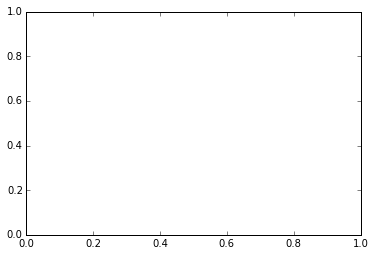

In [48]:

# Show the misclassification rate
print 'The error rate is {} %'.format(compute_error_rate(l, gt)) 

# Plot the misclassified samples
# Find the samples
idx_wellclass = np.where(l == gt)
idx_misclass =  np.where(l != gt)

# Maybe we have to swap the cluster
if (np.size(idx_misclass) > np.size(idx_wellclass)):
    tmp = idx_wellclass[:]
    idx_wellclass = idx_misclass[:]
    idx_misclass = tmp[:]
    del tmp
    
# Get the data
data_wellclass = data[idx_wellclass,:]
data_misclass = data[idx_misclass,:]

# Make the plot
fig = plt.figure()
# Find the indexes of the first cluster
legend_tptn = np.where(l == 0)
legend_fpfn = np.where(l == 1)
plt.legend([legend_tptn[0], legend_fpfn[0]], ["TP & TN", "FP & FN"])
# Show the figure
mpld3.display(fig)


(e) Repeat 10 times the k-means fitting and compute the mean error.

In [83]:

# Define the number of repetitions
rep_t = 10



# Accumulate the error
acc_err = 0.
for rep in range(0, 10):
    # Run k-means predict()
    # Run k-means
    ### Use the function predict()
    k_means_cluster = KMeans(n_clusters=2,n_init=1, init='random')
    k_means_cluster.fit(data)
    l = k_means_cluster.predict(data)
    
    if (np.size(np.where(l != gt)) > np.size(np.where(l == gt))):
        l1 = l
        l1[l==1] = 0
        l1[l==0] = 1
        l = l1
    # Check the error and accumulate
    e = compute_error_rate(l, gt)
    #acc_err += np.minimum(e)
    acc_err += e
    print 'The error rate is {} %'.format(e) 
    
# Average the error
acc_err = acc_err / 10

# Show the mean misclassification rate
print 'The mean error rate is {} %'.format(acc_err)

The error rate is 50.0 %
The error rate is 50.0 %
The error rate is 50.0 %
The error rate is 50.0 %
The error rate is 50.0 %
The error rate is 50.0 %
The error rate is 8.1 %
The error rate is 50.0 %
The error rate is 8.2 %
The error rate is 8.2 %
The mean error rate is 37.45 %


### Clustering via fuzzy c-means

(a) Use fuzzy c-means clustering method to find the cluster centers for $c=2$. Check the following link for an example:
https://github.com/scikit-fuzzy/scikit-fuzzy/blob/master/skfuzzy/cluster/tests/test_cmeans.py

In [89]:

# Define the number of clusters
c = 2
# Exponentiation parameter
m = 2.

# Run the fuzzy c-means - need to transpose the data
  # Cluster using correct number of clusters (3)
cntr, U, U0, d, Jm, p, fpc = fuzz.cluster.cmeans(np.transpose(data), c, m, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(U, axis=0)
    # Expected result appears in this order given this random seed
#expected = np.c_[x_corr, y_corr][(1, 0, 2), :]

#np.testing.assert_allclose(expected, cntr, rtol=0.1)


(b) Plot the cluster centers and the membership degree of the data to each one of the two clusters.

In [91]:

# Plot a representation depending of the membership
### Create a mesh grid using np.grid()
grid_x, grid_y = np.mgrid[-4.:5.:200j, -4.:5.:200j]
### Use the function griddata() in order to create the surface based on the membership degree 
grid_z0 = griddata(data[cluster_membership == 0, :])
grid_z1 = griddata(data[cluster_membership == 1, :])
fig = plt.figure()
plt.imshow(grid_z0.T, extent=(-4,5,-4,5), origin='lower')
plt.title('Membership to belong to the class #1')
plt.figure()
plt.imshow(grid_z1.T, extent=(-4,5,-4,5), origin='lower')
plt.title('Membership to belong to the class #2')
plt.show()


TypeError: griddata() takes at least 3 arguments (1 given)

(c) Plot in each data point to the most probable cluster to which it will belongs. Plot also the centroids.

In [ ]:
...

(d) Compute the misclassifcation error rate.

In [93]:
print np.size(np.where(cluster_membership == gt))

83


## Retina segmentation using k-means and fuzzy c-means

In [ ]:

# Import scikit-image for input-output manipulation
from skimage import io
from skimage import img_as_float


Assuming that the image can be clustered with four classes:

* One cluster with artefacts at the edges of the image
* One cluster with the optic nerve and other artefacts
* One cluster with noise across the image
* One cluster with the vessels

In [ ]:

# Number of classes
nb_classes = 4


(a) From the `data` folder, load the retina image `retina.jpg`. Convert it into float type.

In [ ]:

# Load the images
# Use the function img_as_float()
# Use the function io.imread()
retina_im = ...

# Show the results
fig, ax = plt.subplots()
ax.imshow(retina_im)
ax.set_title('Original image')
ax.axis('off')

plt.show()


(b) Complete the following Python function. 

* Compute a background image using a median filtering for each colour channel with a square kernel of size 30. 
* Subtract each background channel to the original channel. 
* Normalise each channel using min-max normalisation.

In [ ]:

# Import morpho element
from skimage.morphology import square
# Import the median filtering
from skimage.filter.rank import median

# Function to pre process the images
def PreProcessing(rgb_image):
    output = np.zeros(np.shape(rgb_image))
    
    # Obtain the background image for each channel through median filtering
    background_im_r = ...
    background_im_g = ...
    background_im_b = ...
    
    # Remove the background to the original channels
    output[:, :, 0] = ...
    output[:, :, 1] = ...
    output[:, :, 2] = ...
    
    # Normalise the image
    output[:, :, 0] = normalise_im(...)
    output[:, :, 1] = normalise_im(...)
    output[:, :, 2] = normalise_im(...)
    
    return output

# Function to apply min-max normalisation
def normalise_im(im_2d):
    return ...


(c) Apply the pre-processing to retina image and plot the resulting image.

In [ ]:
...

(d) Extract the characteristic features from the pre-processed image.

In [ ]:

# Extraction of the data
### You can use np.reshape()
data = ...


(e) Run k-means with 10 iterations and `k-means++` as initialisation of the cluster.

In [ ]:
...

(f) Plot each cluster to observe the segmentation.

In [ ]:
...

(g) Run fuzzy c-means.

In [ ]:
...

(h) Plot the degree of membership for each cluster to depict the segmentation.

In [ ]:
...